In [1]:
import multiprocessing
# from manage_experiments import find_finished
from multiprocessing import Pool
import pandas as pd
import json as _json

import glob as _glob

from tqdm import tqdm


def find_finished(folder, select_variables):
        """
                finds all tasks that are finished.
                The tasks are assumed to be created with
                create_tasks and computed with
                ranking_correlations.

                folder has form r'res/'
        """
        finished = []
        for filename in tqdm(_glob.glob(folder+'*.results')):
                with open(filename, 'r') as file:
                        results = _json.load(file)
                        if results['done']:
                                criterion = True
                                for var in select_variables:
                                        if not results[var] == select_variables[var]:
                                                criterion = False
                                if criterion:
                                        finished.append(filename)
        return finished


def pandas_df_from_results(fold):
    json_data = []
    finished = find_finished(fold+r"/", {})
    for f in finished:
        with open(f,"r") as file: 
            data = _json.load(file)
        #     data['losses_0'] = None
        #     data['losses_1'] = None
        #     data['losses_2'] = None
            data['fold_truths_0_train'] = None
            data['fold_truths_0_test'] = None
            data['fold_truths_0_val'] = None
            data['fold_truths_1_train'] = None
            data['fold_truths_1_test'] = None
            data['fold_truths_1_val'] = None
            data['fold_truths_2_train'] = None
            data['fold_truths_2_test'] = None
            data['fold_truths_2_val'] = None
            data['fold_preds_0_train'] = None
            data['fold_preds_0_test'] = None
            data['fold_preds_0_val'] = None
            data['fold_preds_1_train'] = None
            data['fold_preds_1_test'] = None
            data['fold_preds_1_val'] = None
            data['fold_preds_2_train'] = None
            data['fold_preds_2_test'] = None
            data['fold_preds_2_val'] = None
            df_norm = pd.json_normalize(data)
            json_data.append(df_norm)
    return pd.concat(json_data, ignore_index = True)


def f(fold):
    df = pandas_df_from_results(fold)
    df.to_csv(fold+".csv",index=False)

In [2]:
if __name__ == '__main__':
    results_folders = [
        'results_tuning'
        ]
    for fold in results_folders:
        print(fold)
        f(fold)
    # with Pool(1) as p:
        # print(p.map(f,results_folders))

results_tuning


100%|██████████| 312/312 [00:00<00:00, 1697.69it/s]


In [3]:
import pandas as pd
df = pd.read_csv('results_tuning.csv')
df.columns
# df1 = pd.read_csv('res_Embeddings_1.csv')
# df2 = pd.read_csv('res_Embeddings_2.csv')

Index(['model_type', 'hidden_dims', 'df_name', 'epochs', 'learning_rate',
       'weight_decay', 'early_stopping', 'n_splits', 'device', 'batch_size',
       'neighbours', 'done', 'lambda1', 'lambda2', 'AUC_0_val',
       'Confusion_0_val', 'Balanced Accuracy_0_val', 'fold', 'AUC_0_test',
       'Confusion_0_test', 'Balanced Accuracy_0_test', 'AUC_0_train',
       'Confusion_0_train', 'Balanced Accuracy_0_train', 'losses_0',
       'AUC_1_val', 'Confusion_1_val', 'Balanced Accuracy_1_val', 'AUC_1_test',
       'Confusion_1_test', 'Balanced Accuracy_1_test', 'AUC_1_train',
       'Confusion_1_train', 'Balanced Accuracy_1_train', 'losses_1',
       'AUC_2_val', 'Confusion_2_val', 'Balanced Accuracy_2_val', 'AUC_2_test',
       'Confusion_2_test', 'Balanced Accuracy_2_test', 'AUC_2_train',
       'Confusion_2_train', 'Balanced Accuracy_2_train', 'losses_2',
       'AUC_3_val', 'Confusion_3_val', 'Balanced Accuracy_3_val', 'AUC_3_test',
       'Confusion_3_test', 'Balanced Accuracy_3_test'

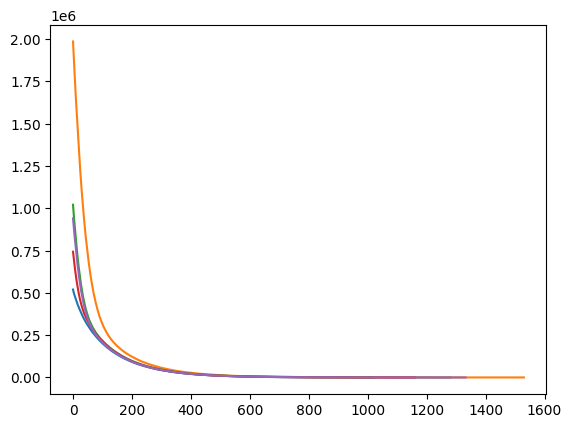

In [4]:
import matplotlib.pyplot as plt
nfolds = 5
for i in range(nfolds):
    plt.plot(eval(df[[f'losses_{i}']].iloc[0,0]))
plt.show()

In [5]:
df = df.query("df_name == 'mindsteps_set_full'")
#df = df.query("df_name == 'mindsteps_set_matrix'")
# mindsteps_set_matrix
df['Balanced_Accuracy_test'] = (sum([df[f'Balanced Accuracy_{i}_test'] for i in range(nfolds)]))/nfolds
df['Balanced_Accuracy_val'] = (sum([df[f'Balanced Accuracy_{i}_val'] for i in range(nfolds)]))/nfolds
df['Balanced_Accuracy_train'] = (sum([df[f'Balanced Accuracy_{i}_train'] for i in range(nfolds)]))/nfolds
cols = ['Balanced_Accuracy_test', 'Balanced_Accuracy_val', 'Balanced_Accuracy_train', 'model_type', 
        'hidden_dims', 'decoder_dim', 'batch_norm', 'dropout', 'weight_decay', 'lambda1', 'lambda2', 'epochs', 'df_name',  'learning_rate', 'early_stopping', 
        ]
print(df.shape)

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

df[cols].sort_values('Balanced_Accuracy_val', ascending=False)

(12, 89)


,Balanced_Accuracy_test,Balanced_Accuracy_val,Balanced_Accuracy_train,model_type,hidden_dims,decoder_dim,batch_norm,dropout,weight_decay,lambda1,lambda2,epochs,df_name,learning_rate,early_stopping
29,0.737110,0.737129,0.740994,GNN,"[4, 2]",16.0,False,0.2,0.0,NaN,NaN,10000,mindsteps_set_full,0.005,200
32,0.737106,0.737085,0.740890,GNN,"[2, 2]",4.0,True,0.0,0.0,NaN,NaN,10000,mindsteps_set_full,0.005,200
13,0.736994,0.737051,0.744060,GNN,"[8, 8]",16.0,False,0.4,0.0,NaN,NaN,10000,mindsteps_set_full,0.005,200
68,0.736994,0.737032,0.740954,GNN,"[2, 2]",4.0,True,0.4,0.0,NaN,NaN,10000,mindsteps_set_full,0.005,200
24,0.736954,0.737024,0.740765,GNN,"[4, 2]",16.0,True,0.0,0.0,NaN,NaN,10000,mindsteps_set_full,0.005,200
73,0.736949,0.736976,0.740761,GNN,"[2, 2]",16.0,True,0.2,0.0,NaN,NaN,10000,mindsteps_set_full,0.005,200
4,0.736847,0.736868,0.740958,GNN,"[8, 4]",4.0,False,0.2,0.0,NaN,NaN,10000,mindsteps_set_full,0.005,200
39,0.736827,0.736836,0.740693,GNN,"[4, 4]",8.0,False,0.0,0.0,NaN,NaN,10000,mindsteps_set_full,0.005,200
62,0.736803,0.736795,0.741028,GNN,"[8, 8]",4.0,True,0.2,0.0,NaN,NaN,10000,mindsteps_set_full,0.005,200
48,0.707388,0.707314,0.708701,IRT,1,NaN,NaN,NaN,0.0,0.00000,0.00001,10000,mindsteps_set_full,0.005,200
